# pypercolate Tutorial

## Bond percolation on linear chains and square lattices

This tutorial demonstrates how to use the *pypercolate* package.
As examples, we present bond percolation with spanning cluster detection on a linear chain and a square grid of variable size, respectively.

## Preamble

In [2]:
# configure plotting
%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, 'figure.figsize': (10, 5), 'font.size': 12, 'figure.facecolor': (1, 1, 1, 0)}
%matplotlib inline

# import packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import percolate
from pprint import pprint

# configure plotting colors
colors = [
    '#0e5a94',
    '#eb008a',
    '#37b349',
    '#f29333',
    '#00aabb',
    '#b31e8d',
    '#f8ca12',
    '#7a2d00',
]
mpl.rcParams['axes.color_cycle'] = colors

## Evolution of one sample state (realization)

First, we get to know the basic unit of computation in the Newman-Ziff algorithm:
a single sample state (realization).
The ``sample_states`` generator function evolves a single realization by successively adding bonds, incrementing the occupation number $n$ by $1$ in each step.

### Linear chain

In [3]:
# Generate linear chain graph with auxiliary nodes for spanning cluster detection
chain = percolate.spanning_1d_chain(length=10)

/home/dansun/anaconda3/envs/percolate/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/dansun/anaconda3/envs/percolate/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/dansun/anaconda3/envs/percolate/lib/python3.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/dansun/anaconda3/envs/percolate/lib/python3.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is dep

{'M': 9,
 'N': 10,
 'has_spanning_cluster': False,
 'max_cluster_size': 1,
 'moments': array([9., 9., 9., 9., 9.]),
 'n': 0}
{'M': 9,
 'N': 10,
 'edge': (5, 6),
 'has_spanning_cluster': False,
 'max_cluster_size': 2,
 'moments': array([8., 8., 8., 8., 8.]),
 'n': 1}
{'M': 9,
 'N': 10,
 'edge': (2, 3),
 'has_spanning_cluster': False,
 'max_cluster_size': 2,
 'moments': array([ 7.,  8., 10., 14., 22.]),
 'n': 2}
{'M': 9,
 'N': 10,
 'edge': (6, 7),
 'has_spanning_cluster': False,
 'max_cluster_size': 3,
 'moments': array([ 6.,  7.,  9., 13., 21.]),
 'n': 3}
{'M': 9,
 'N': 10,
 'edge': (4, 5),
 'has_spanning_cluster': False,
 'max_cluster_size': 4,
 'moments': array([ 5.,  6.,  8., 12., 20.]),
 'n': 4}
{'M': 9,
 'N': 10,
 'edge': (1, 2),
 'has_spanning_cluster': False,
 'max_cluster_size': 4,
 'moments': array([ 4.,  6., 12., 30., 84.]),
 'n': 5}
{'M': 9,
 'N': 10,
 'edge': (8, 9),
 'has_spanning_cluster': False,
 'max_cluster_size': 4,
 'moments': array([ 3.,  6., 14., 36., 98.]),
 'n': 6

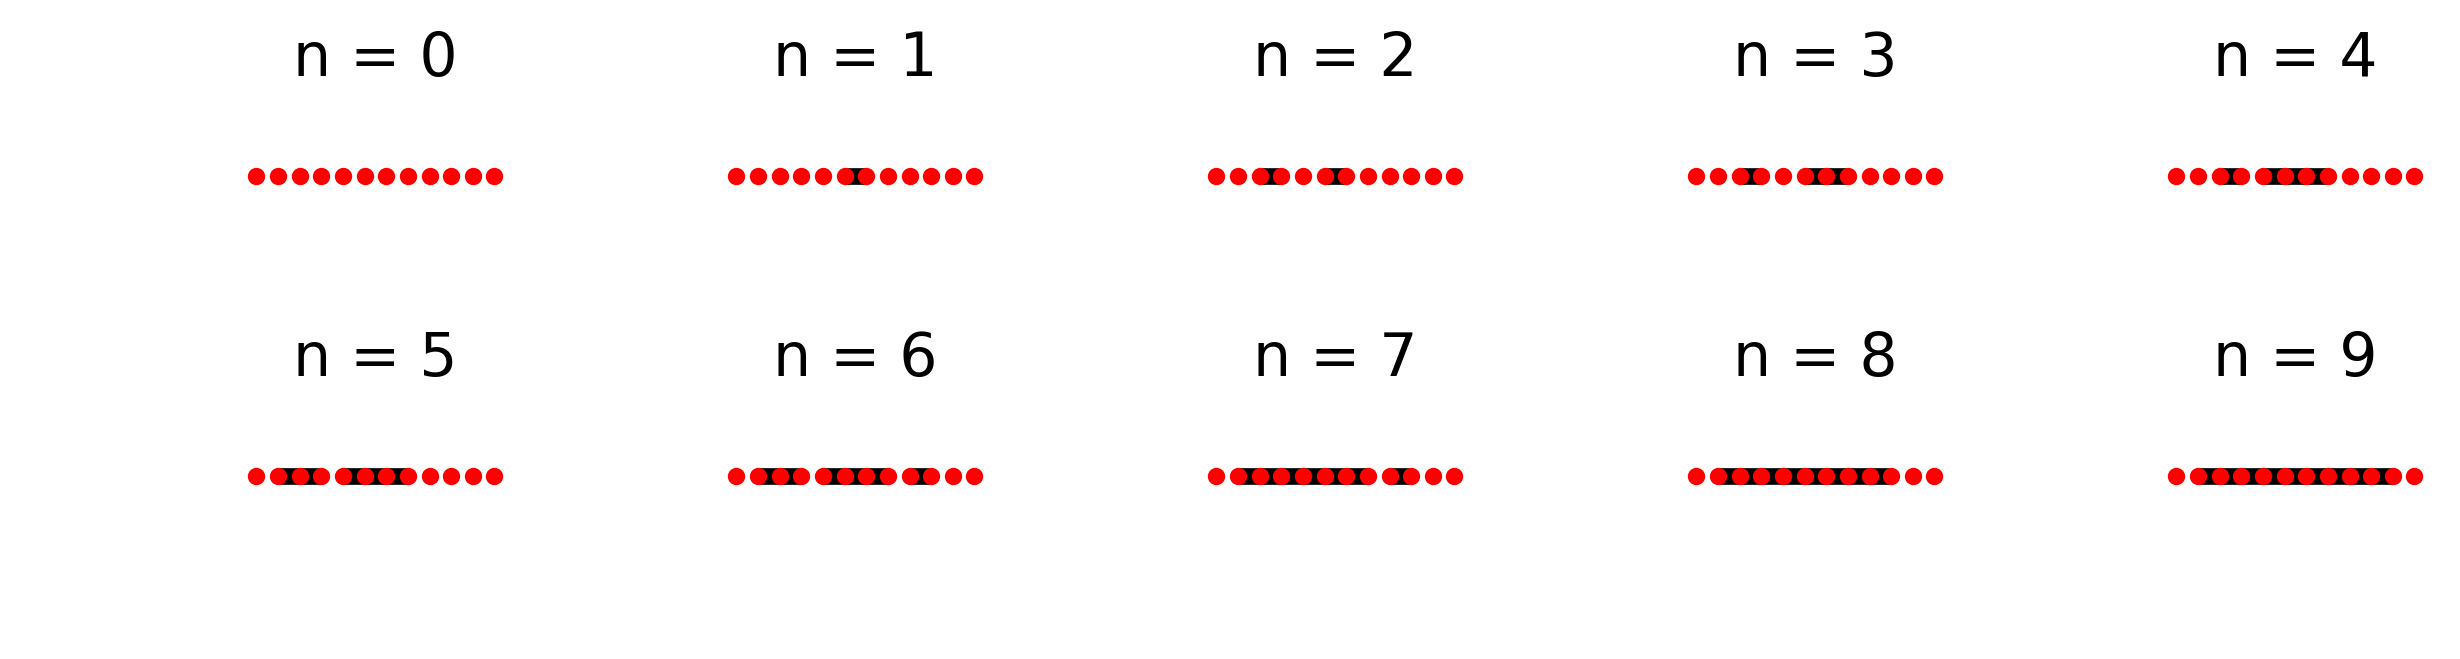

In [4]:
# Evolve sample state and plot it at the same time
edges = list()
fig, axes = plt.subplots(figsize=(8.0, 2.0), ncols=5, nrows=2, squeeze=True)
axes = axes.ravel()
for i, sample_state in enumerate(percolate.sample_states(chain)):
    if 'edge' in sample_state:
        edge = sample_state['edge']
        edges.append(edge)
    nx.draw(
        chain,
        ax=axes[i],
        edgelist=edges,
        width=4,
        pos={node: (node, 0) for node in chain.nodes_iter()},
        node_size=10,
    )
    axes[i].set_title('n = {}'.format(i))
    pprint(sample_state)
plt.tight_layout(0)
plt.show()

**Figure**: Evolution of a single realization of bond percolation on the linear chain with 10 nodes.
The terminal nodes are the auxiliary nodes for spanning cluster detection.

### Square grid

In [5]:
# Generate square grid graph with auxiliary nodes for spanning cluster detection
grid = percolate.spanning_2d_grid(3)

{'M': 12,
 'N': 9,
 'has_spanning_cluster': False,
 'max_cluster_size': 1,
 'moments': array([8., 8., 8., 8., 8.]),
 'n': 0}
{'M': 12,
 'N': 9,
 'edge': ((2, 1), (3, 1)),
 'has_spanning_cluster': False,
 'max_cluster_size': 2,
 'moments': array([7., 7., 7., 7., 7.]),
 'n': 1}
{'M': 12,
 'N': 9,
 'edge': ((2, 1), (2, 2)),
 'has_spanning_cluster': False,
 'max_cluster_size': 3,
 'moments': array([6., 6., 6., 6., 6.]),
 'n': 2}
{'M': 12,
 'N': 9,
 'edge': ((3, 0), (3, 1)),
 'has_spanning_cluster': False,
 'max_cluster_size': 4,
 'moments': array([5., 5., 5., 5., 5.]),
 'n': 3}
{'M': 12,
 'N': 9,
 'edge': ((1, 0), (2, 0)),
 'has_spanning_cluster': False,
 'max_cluster_size': 4,
 'moments': array([ 4.,  5.,  7., 11., 19.]),
 'n': 4}
{'M': 12,
 'N': 9,
 'edge': ((2, 0), (2, 1)),
 'has_spanning_cluster': True,
 'max_cluster_size': 6,
 'moments': array([3., 3., 3., 3., 3.]),
 'n': 5}
{'M': 12,
 'N': 9,
 'edge': ((1, 2), (2, 2)),
 'has_spanning_cluster': True,
 'max_cluster_size': 7,
 'moments'

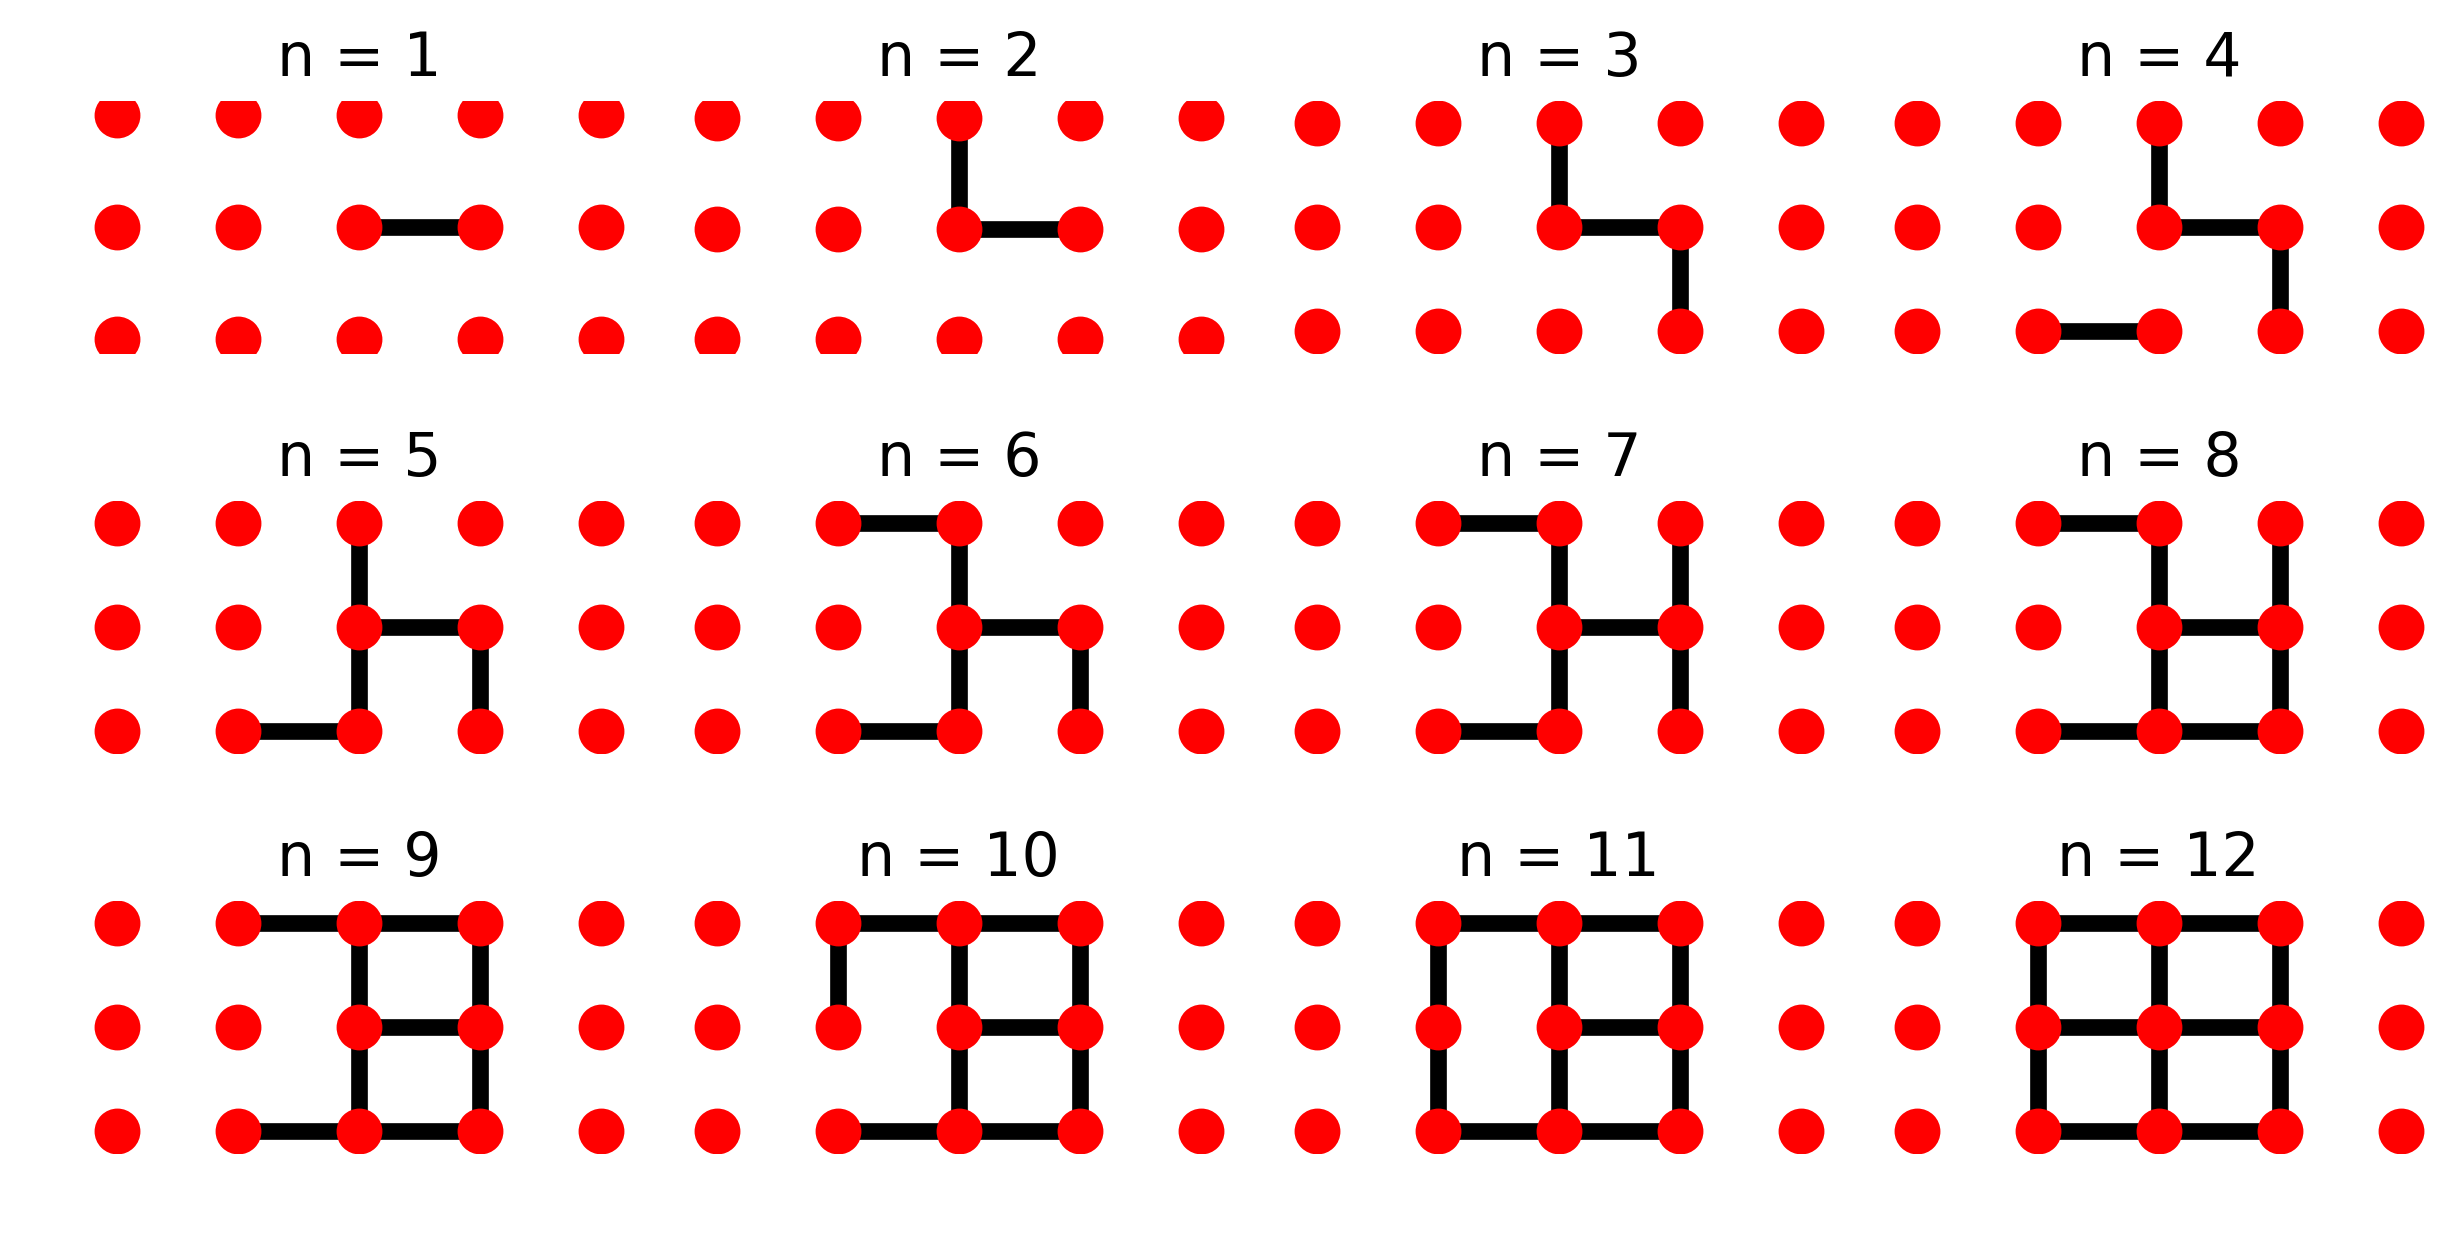

In [6]:
# Evolve sample state and plot it at the same time
edges = list()
fig, axes = plt.subplots(figsize=(8.0, 4.0), ncols=4, nrows=3, squeeze=True)
axes = axes.ravel()
for i, sample_state in enumerate(percolate.sample_states(grid)):
    if 'edge' in sample_state:
        edge = sample_state['edge']
        edges.append(edge)
        nx.draw(
            grid,
            ax=axes[i - 1],
            edgelist=edges,
            width=4,
            pos={node: node for node in grid.nodes_iter()},
            node_size=100,
        )
        axes[i - 1].set_title('n = {}'.format(i))
    pprint(sample_state)
plt.tight_layout(0)
plt.show()

**Figure**: Evolution of a single realization of bond percolation on the 3x3 square grid.
The left-hand and right-hand outermost nodes are the auxiliary nodes for spanning cluster detection.

## Single run statistics

Now, we want to compare cluster statistics for several sample states (realizations) evolved in parallel.
We also want to compare these statistics for several system sizes $L$.

In [7]:
# number of parallel runs (sample states to evolve)
runs = 4

### Linear chain

In [8]:
# system sizes
chain_ls = [10, 100, 1000, 10000]

In [9]:
# generate the linear chain graphs with spanning cluster detection
# for all system sizes
chain_graphs = [ percolate.spanning_1d_chain(l) for l in chain_ls ]

In [10]:
# compute the single-run cluster statistics for all sample states
# and system sizes
chain_single_runs = [
    [ percolate.single_run_arrays(graph=chain_graph) for _ in range(runs) ]
    for chain_graph in chain_graphs
]

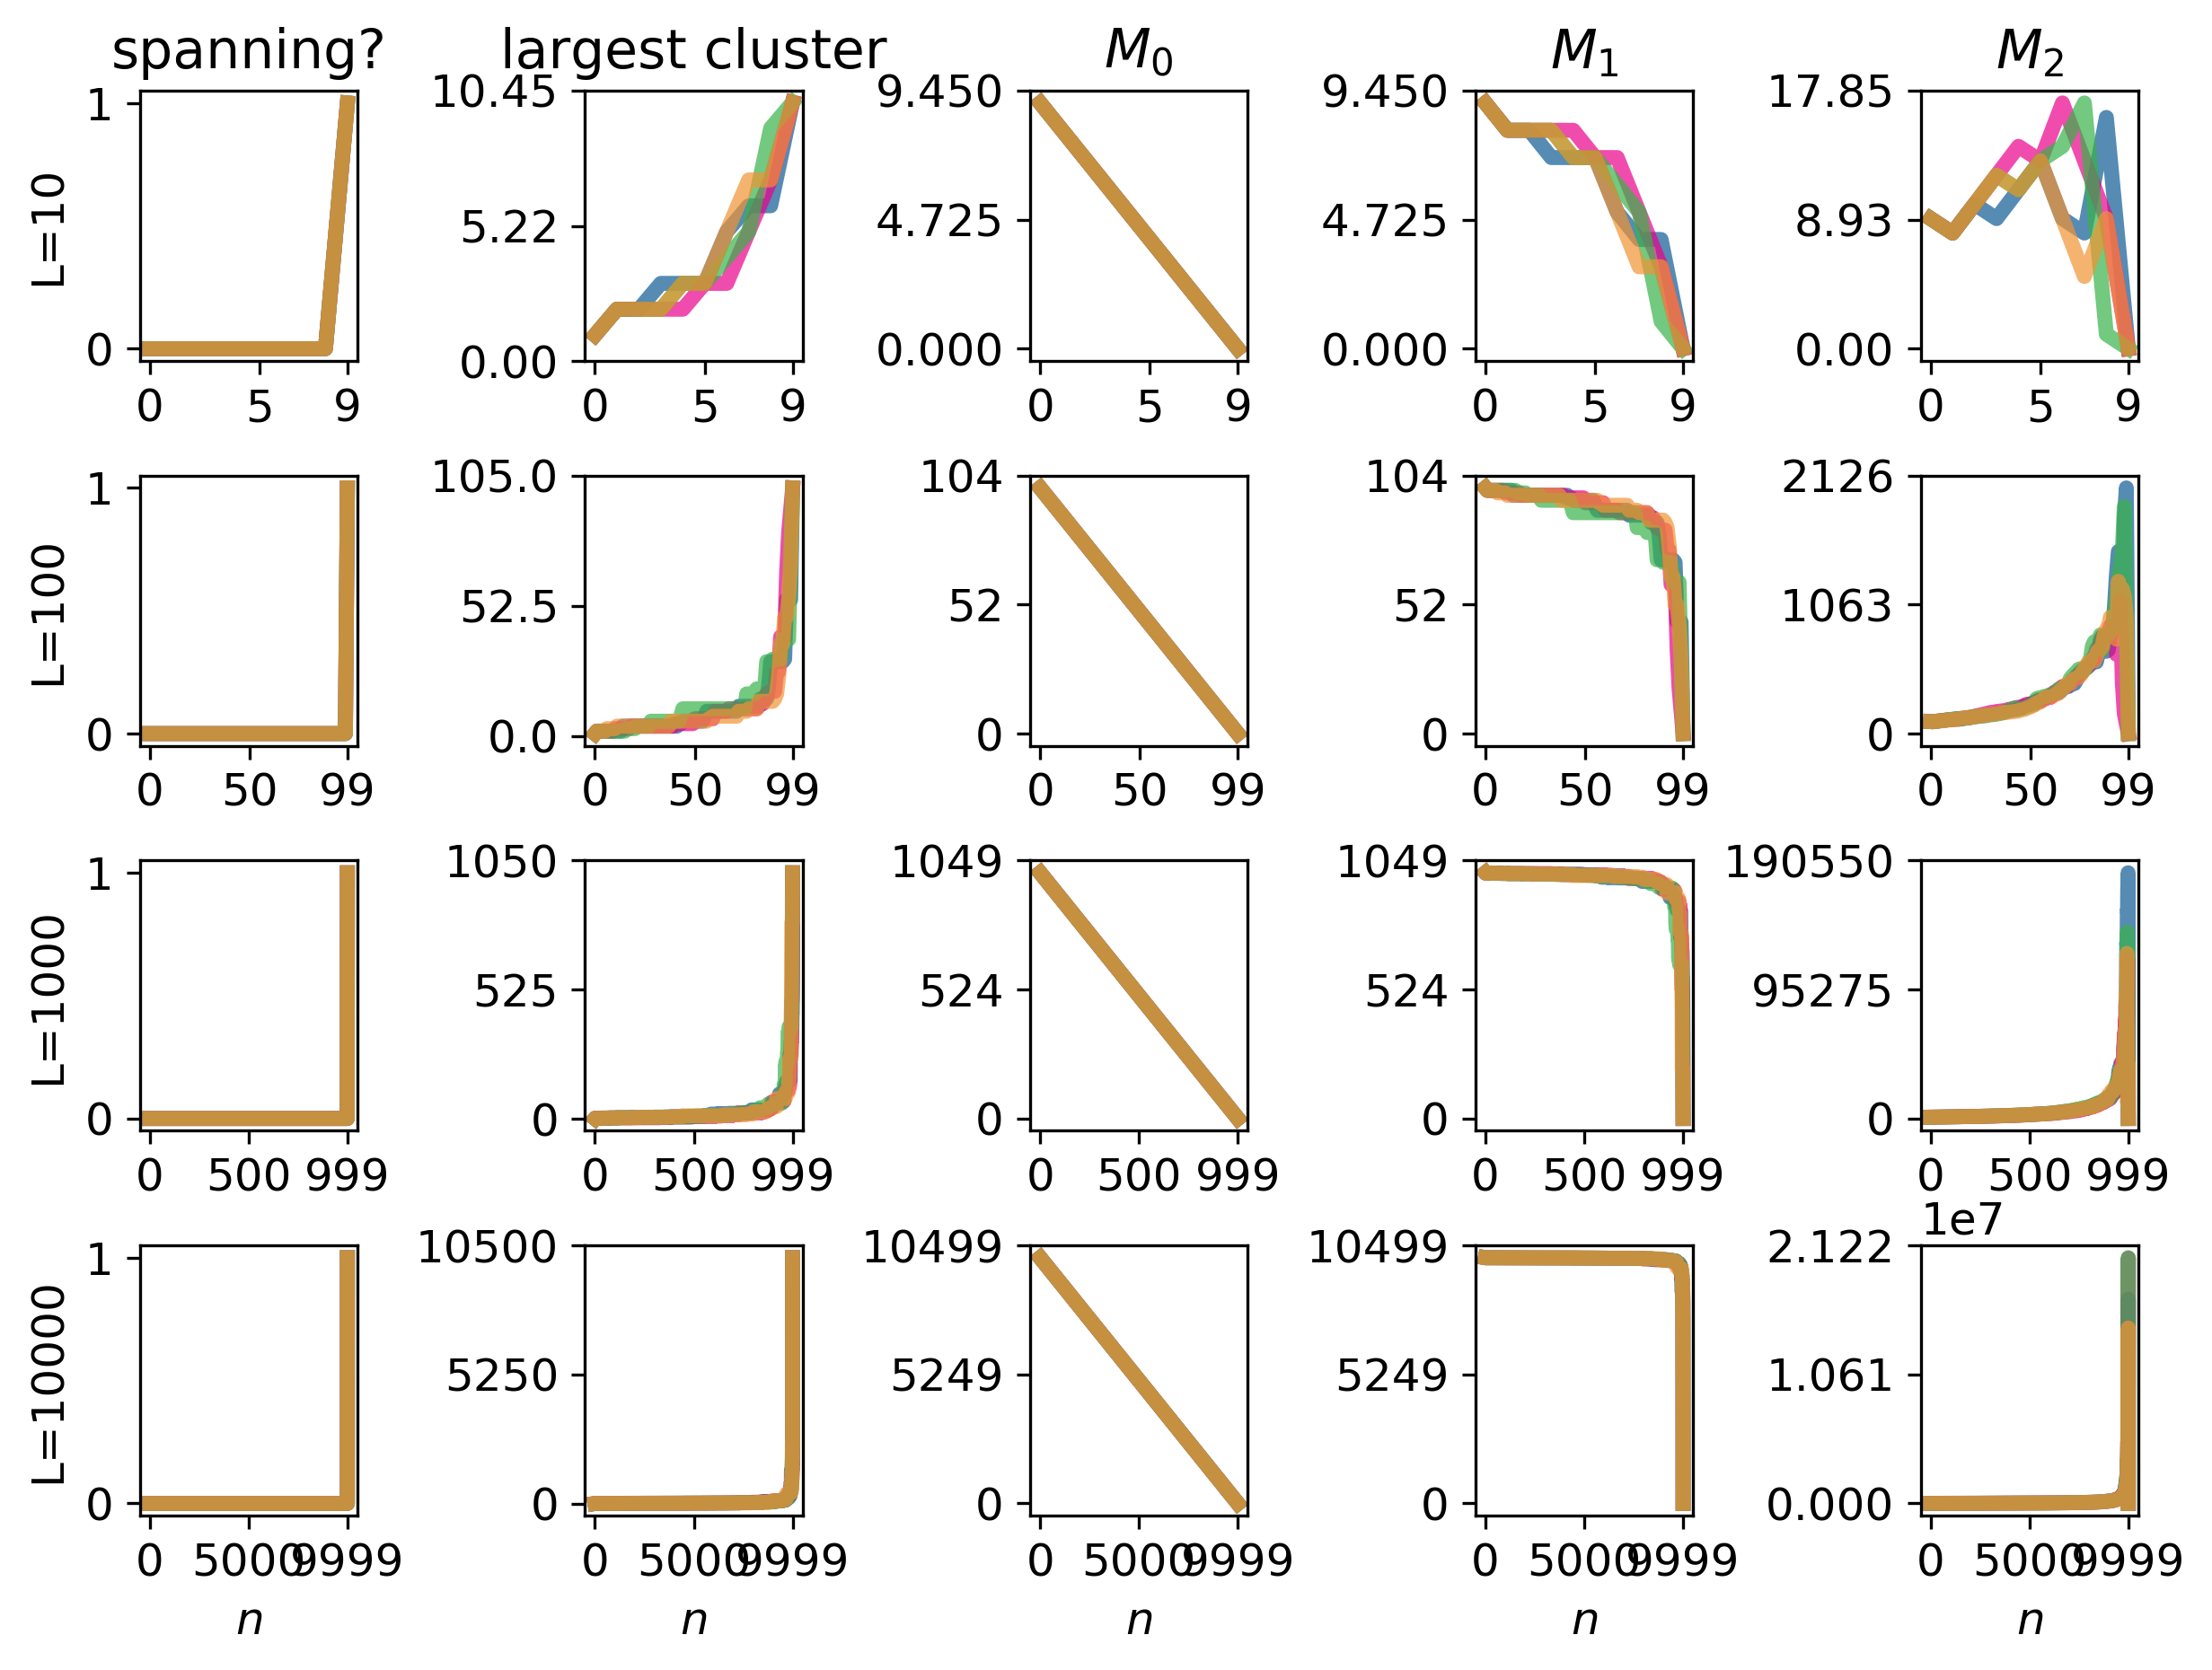

In [11]:
# plot
fig, axes = plt.subplots(
    nrows=len(chain_ls), ncols=5, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(chain_ls):
    for single_run in chain_single_runs[l_index]:
        axes[l_index, 0].plot(
            single_run['has_spanning_cluster'], lw=4, alpha=0.7, rasterized=True
        )
        axes[l_index, 1].plot(
            single_run['max_cluster_size'], lw=4, alpha=0.7, rasterized=True
        )    
        for k in range(3):
            axes[l_index, k + 2].plot(
                single_run['moments'][k], lw=4, alpha=0.7, rasterized=True
            )
            
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    
    for ax in axes[l_index, :]:
        num_edges = chain_single_runs[l_index][0]['M']
        ax.set_xlim(xmax=1.05 * num_edges)
        ax.set_xticks([0, l / 2, l - 1])
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
    axes[l_index, 0].set_yticks([0, 1])        
        
axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')
    
plt.tight_layout(0)
plt.show()

**Figure**: Cluster statistics for single realizations of bond percolation on the linear chain with $L$ nodes, evolved according to the Newman-Ziff algorithm over all occupation numbers $n = 0 \ldots L - 1$.

In [12]:
# clear memory
del chain_single_runs

### Square grid

In [13]:
# system sizes
grid_ls = [3, 10, 32, 100, 316]

In [14]:
# generate the square grid graphs with spanning cluster detection
# for all system sizes
grid_graphs = [ percolate.spanning_2d_grid(l) for l in grid_ls ]

In [15]:
# compute the single-run cluster statistics for all sample states
# and system sizes
grid_single_runs = [
    [ percolate.single_run_arrays(graph=grid_graph) for _ in range(runs) ]
    for grid_graph in grid_graphs
]

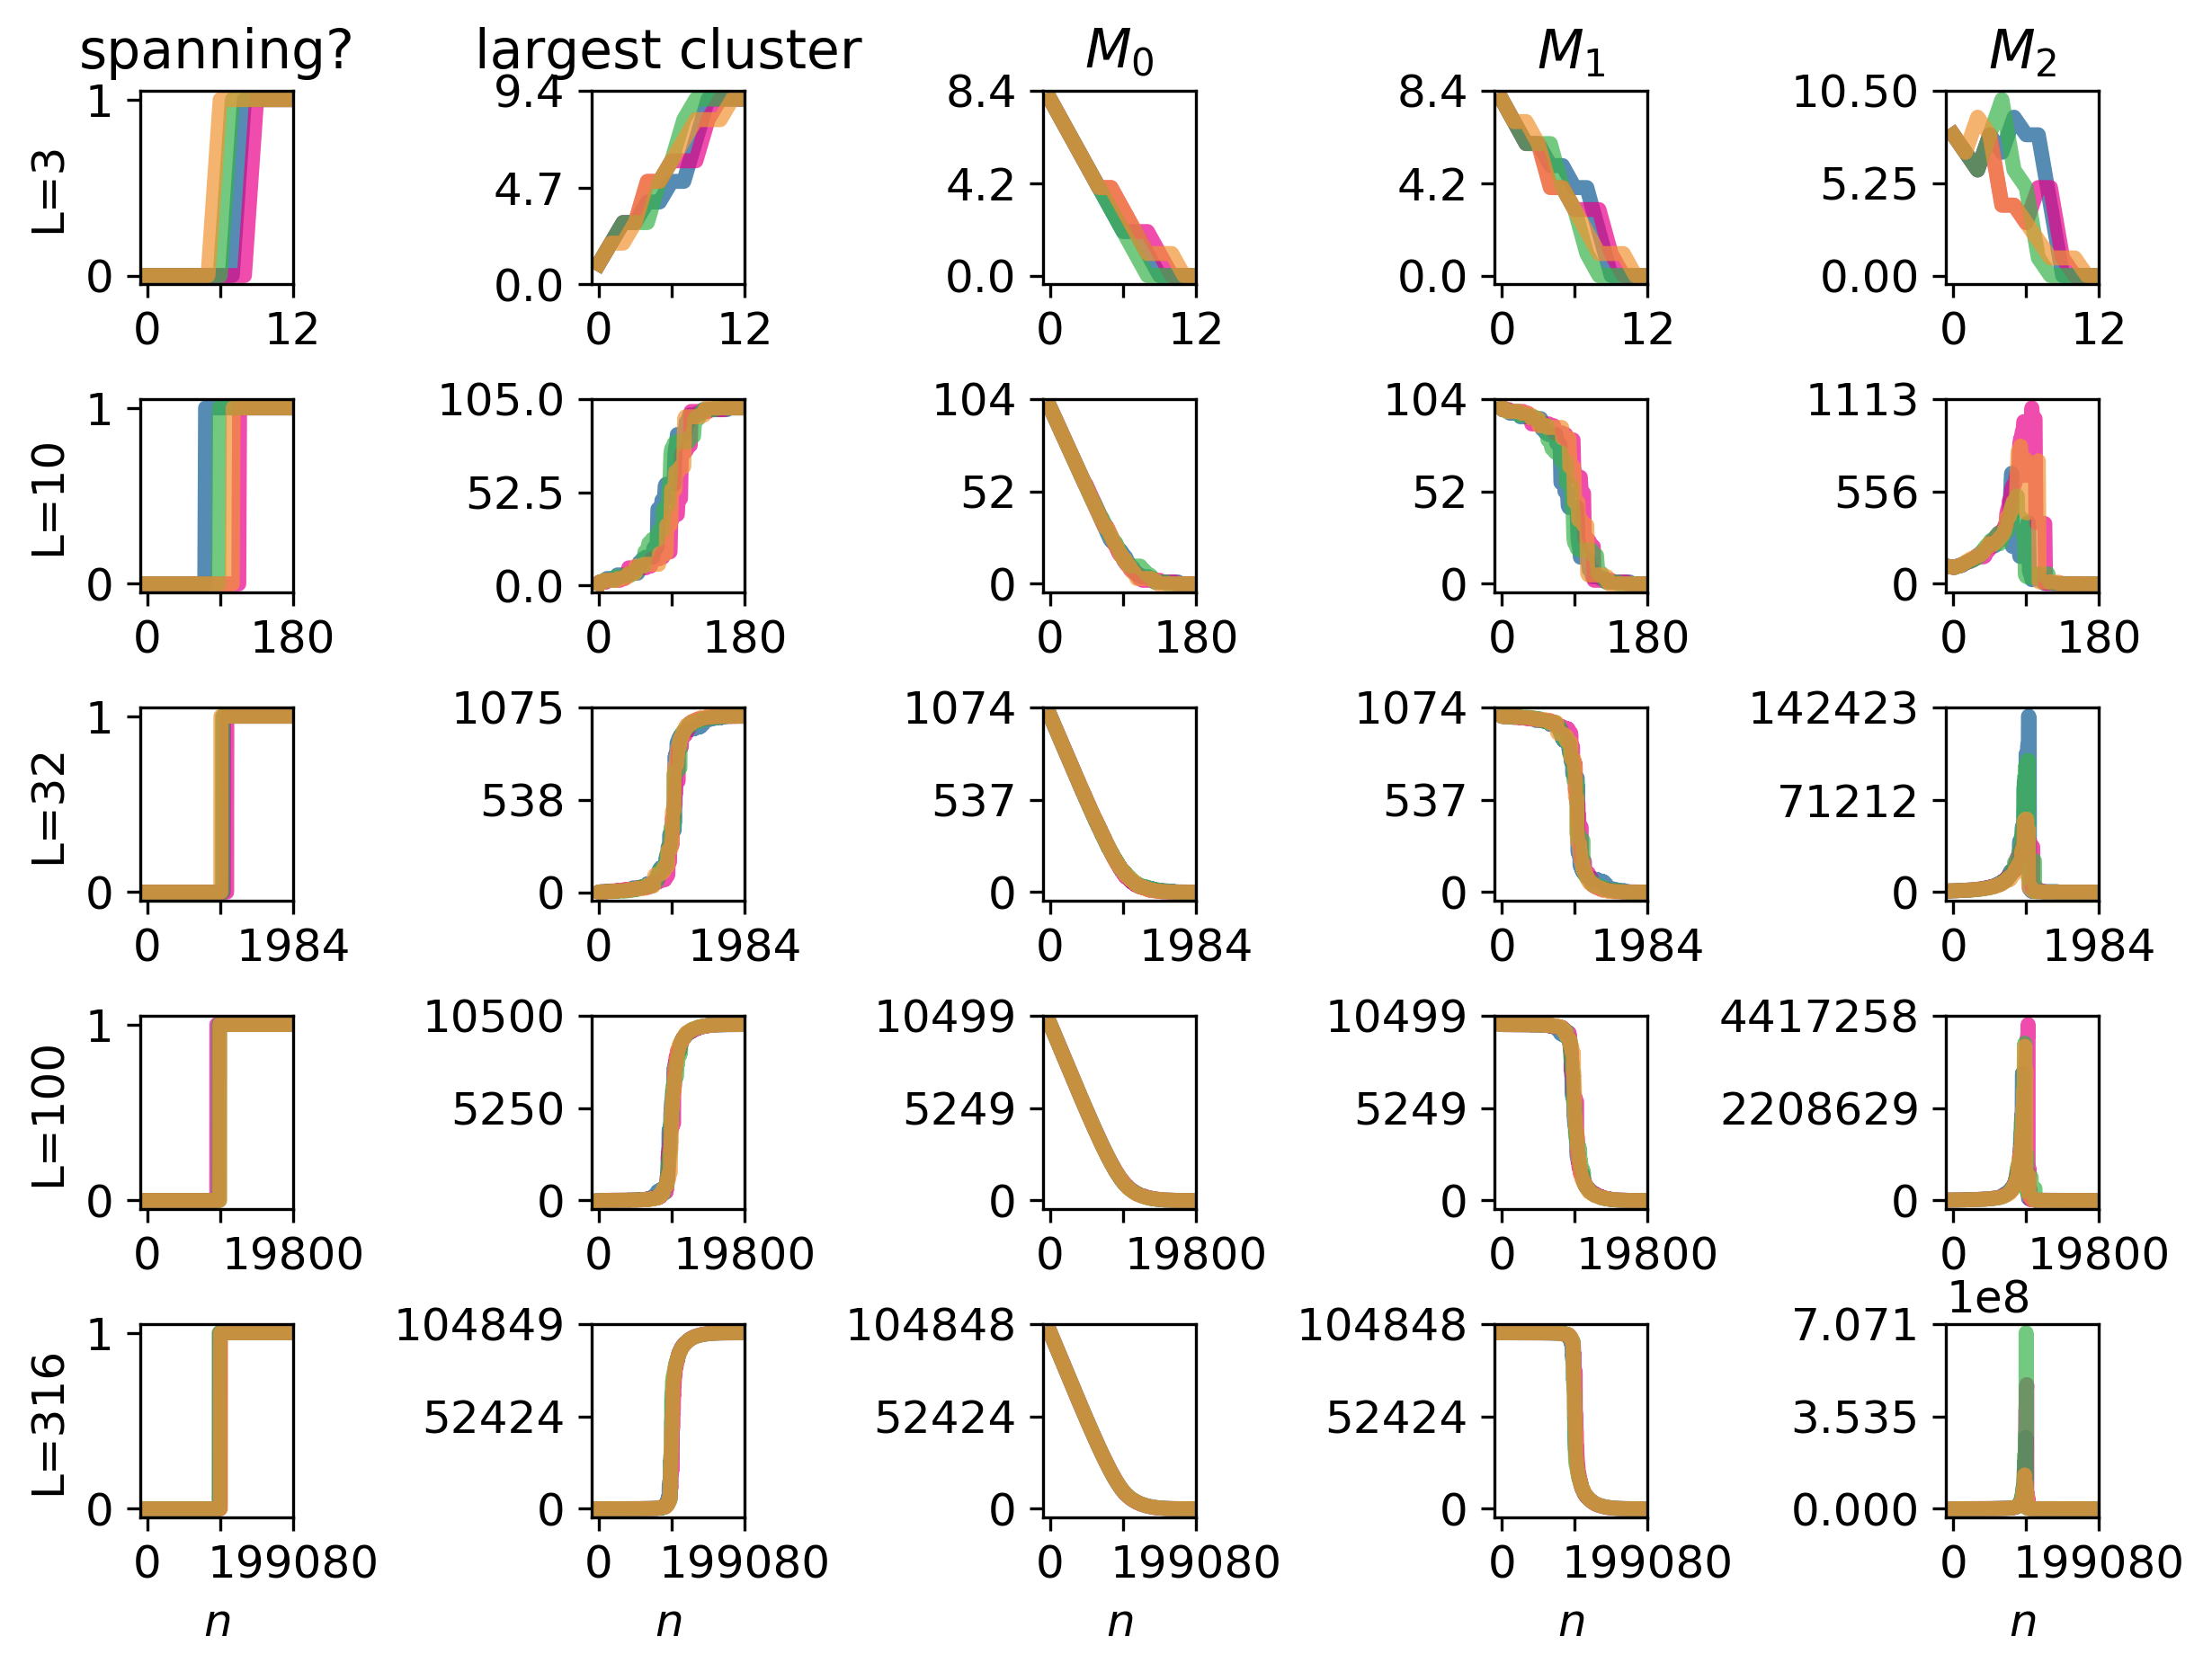

In [16]:
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ls), ncols=5, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(grid_ls):
    for single_run in grid_single_runs[l_index]:
        axes[l_index, 0].plot(
            single_run['has_spanning_cluster'], lw=4, alpha=0.7, rasterized=True
        )
        axes[l_index, 1].plot(
            single_run['max_cluster_size'], lw=4, alpha=0.7, rasterized=True
        )    
        for k in range(3):
            axes[l_index, k + 2].plot(
                single_run['moments'][k], lw=4, alpha=0.7, rasterized=True
            )
            
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    
    for ax in axes[l_index, :]:
        num_edges = grid_single_runs[l_index][0]['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_xticklabels(['0', '', num_edges])
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))

    axes[l_index, 0].set_yticks([0, 1])        
        
axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')
    
plt.tight_layout(0)
plt.show()

**Figure**: Cluster statistics for single realizations of bond percolation on the $L \times L$ square grid, evolved according to the Newman-Ziff algorithm over all occupation numbers $n = 0 \ldots 2 L (L - 1)$.

In [17]:
# clear memory
del grid_single_runs

## Microcanonical ensemble averages

Next we explore how *pypercolate* enables us to aggregate cluster statistics across a number of runs (realizations), evolved over all occupation numbers.
For each occupation number, this yields the microcanonical average.

### Linear chain

In [18]:
# number of runs
chain_runs = 40
# system sizes
chain_ls = [10, 100, 1000, 10000]

In [19]:
# generate the linear chain graphs with spanning cluster detection
# for all system sizes
chain_graphs = [ percolate.spanning_1d_chain(l) for l in chain_ls ]

In [20]:
# compute the microcanonical averages for all system sizes
chain_microcanonical_averages = [
    percolate.microcanonical_averages(
        graph=chain_graph, runs=chain_runs
    )
    for chain_graph in chain_graphs
]
# combine microcanonical averages into one array
chain_microcanonical_averages_arrays = [
    percolate.microcanonical_averages_arrays(avg)
    for avg in chain_microcanonical_averages
]

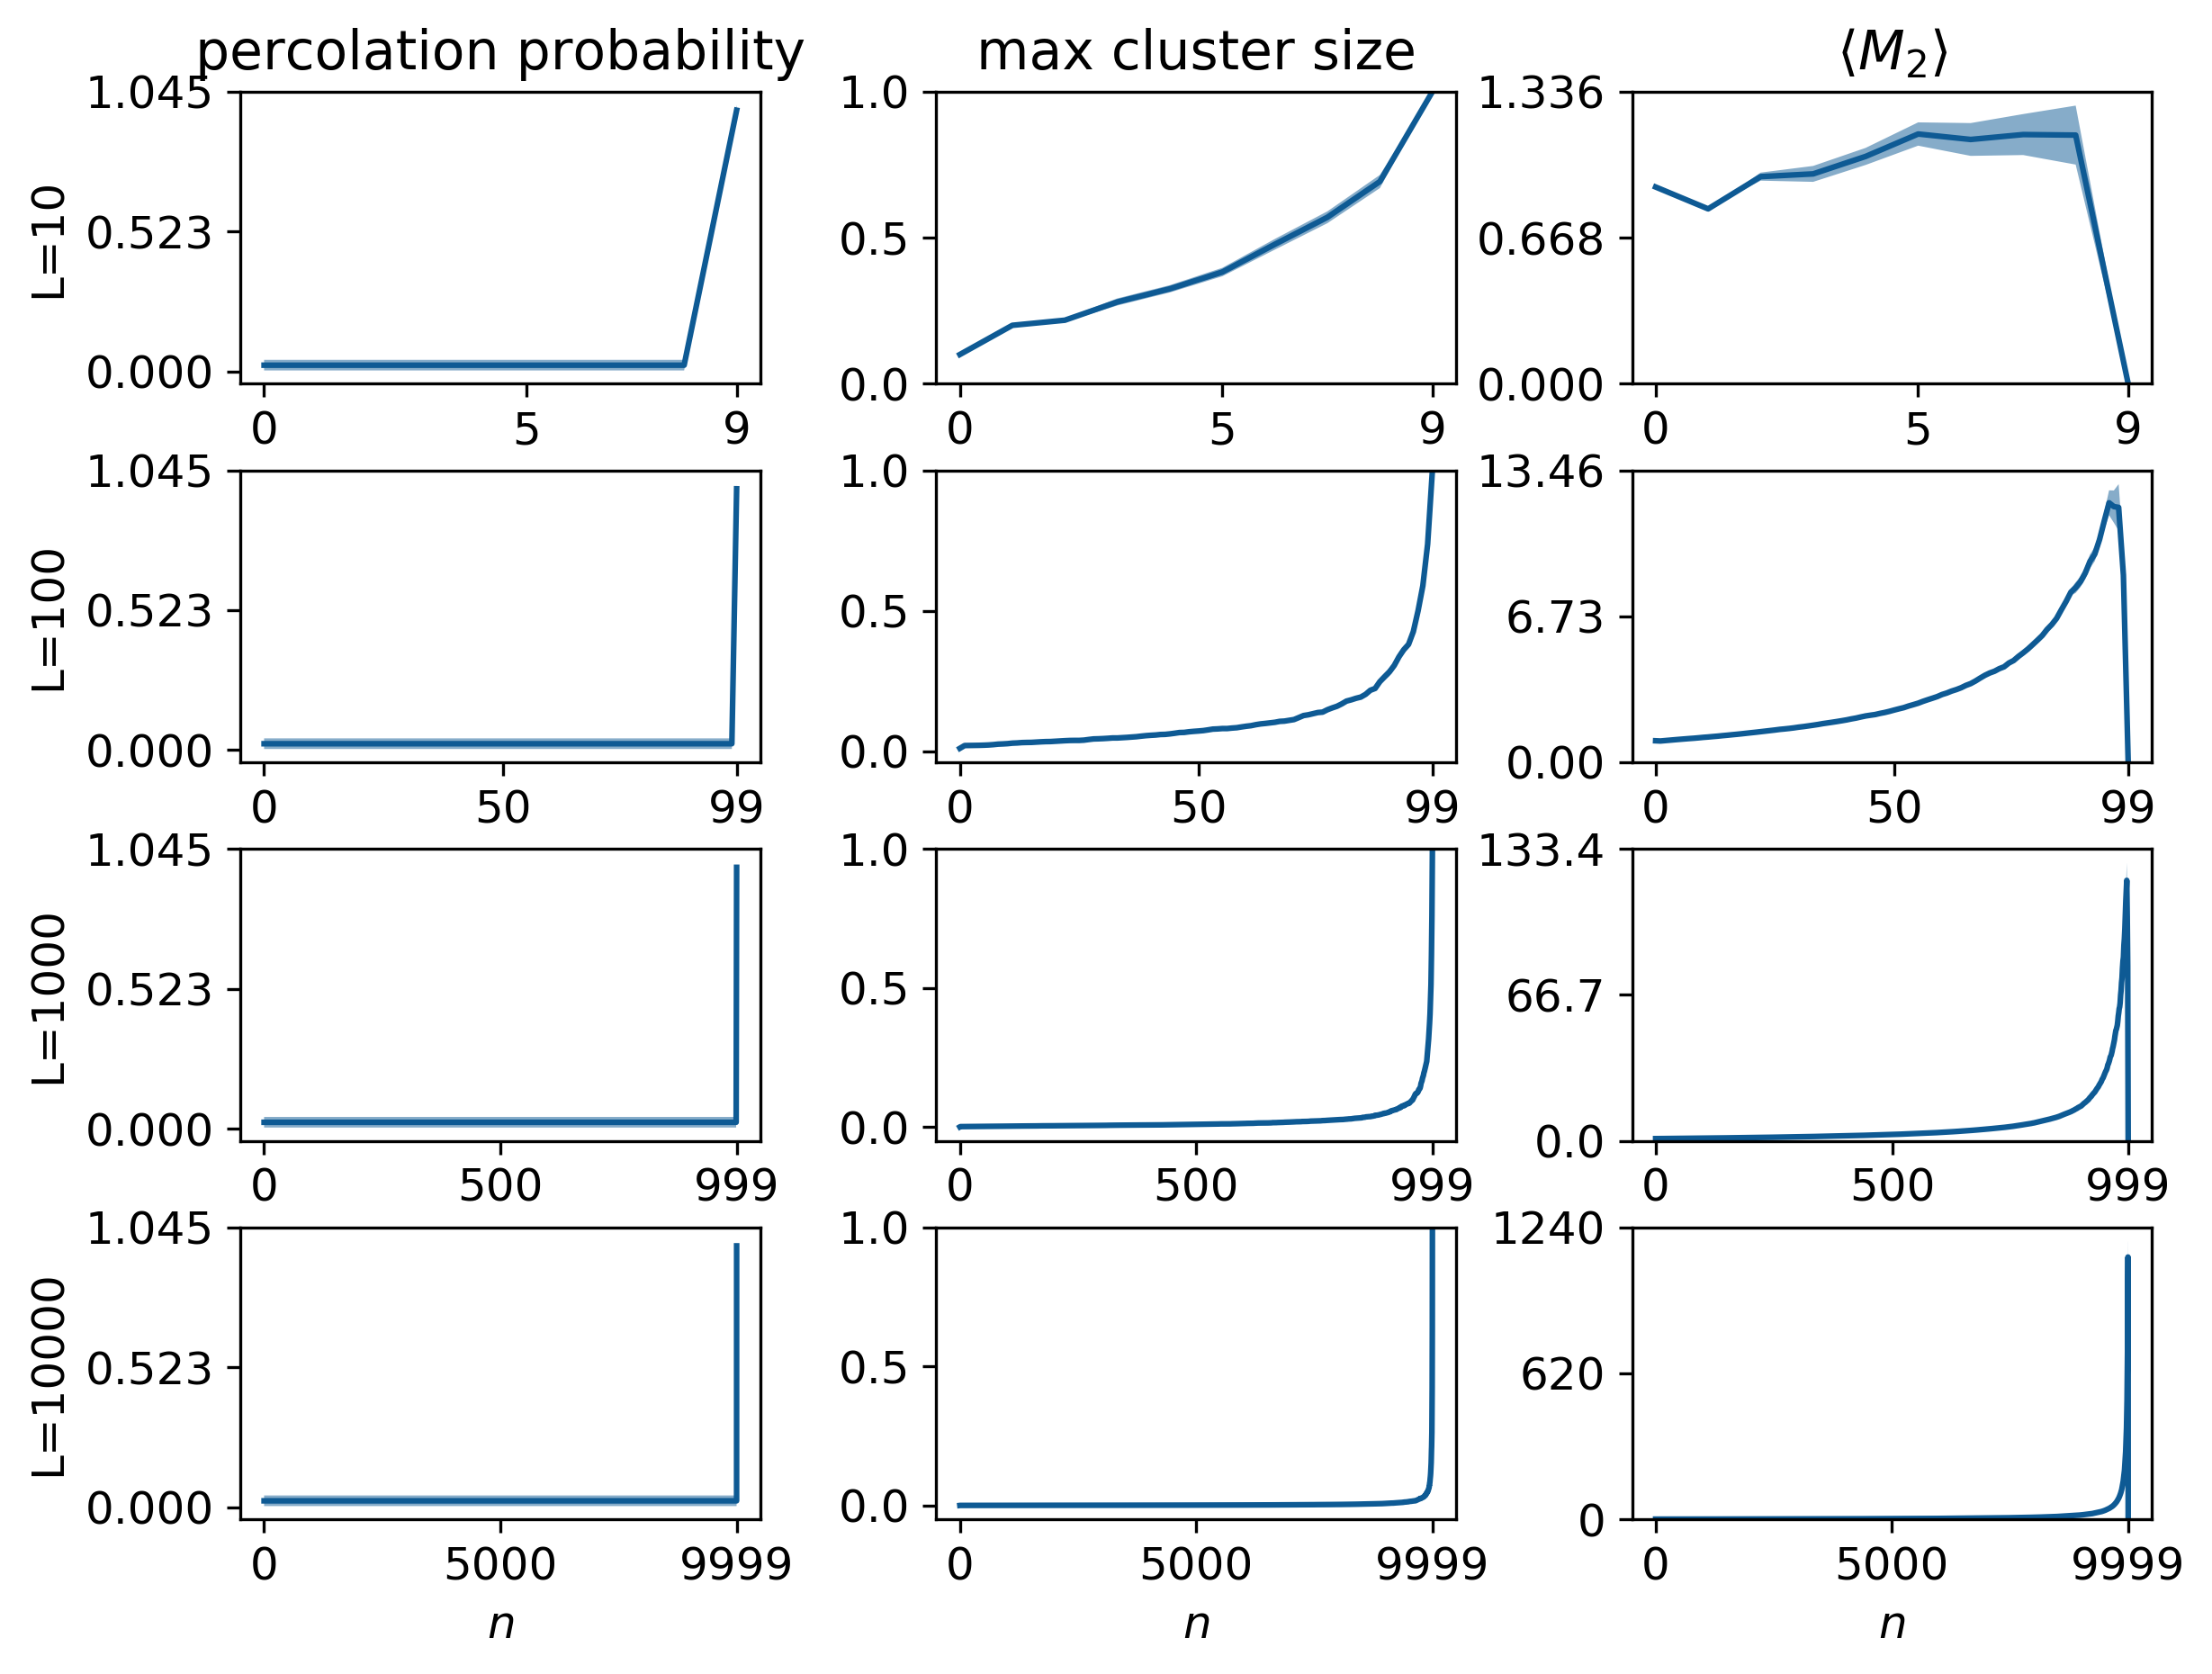

In [32]:
# plot
fig, axes = plt.subplots(
    nrows=len(chain_ls), ncols=3, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(chain_ls):
    avg_arrays = chain_microcanonical_averages_arrays[l_index]
    
    line, = axes[l_index, 0].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster'],
        rasterized=True,
    )
    axes[l_index, 0].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster_ci'].T[1],
        avg_arrays['spanning_cluster_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )
    
    line, = axes[l_index, 1].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size'],
        rasterized=True,
    )    
    axes[l_index, 1].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size_ci'].T[1],
        avg_arrays['max_cluster_size_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )

    axes[l_index, 2].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments'][2],
        rasterized=True,
    )        
    axes[l_index, 2].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments_ci'][2].T[1],
        avg_arrays['moments_ci'][2].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )
    
    
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    axes[l_index, 1].set_ylim(ymax=1.0)
    axes[l_index, 2].set_ylim(ymin=0.0)
    
    for ax in axes[l_index, :]:
        num_edges = avg_arrays['M']
        ax.set_xlim(xmax=1.05 * num_edges)
        ax.set_xticks([0, l / 2, num_edges])
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'percolation probability')
axes[0, 1].set_title(r'max cluster size')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')
    
plt.tight_layout(0)
plt.show()

**Figure**: Microcanonical averages of cluster statistics of bond percolation on the linear chain with $L$ nodes, over $40$ runs. The samples of the microcanonical ensembles have been evolved by the Newman-Ziff algorithm over all occupation numbers $n = 0 \ldots L - 1$.

### Square grid

In [22]:
# number of runs
grid_runs = 40
# system sizes
grid_ls = [3, 10, 32, 100, 316]

In [23]:
# generate the square grid graphs with spanning cluster detection
# for all system sizes
grid_graphs = [ percolate.spanning_2d_grid(l) for l in grid_ls ]

In [24]:
# compute the microcanonical averages for all system sizes
grid_microcanonical_averages = [
    percolate.microcanonical_averages(
        graph=grid_graph, runs=grid_runs
    )
    for grid_graph in grid_graphs
]
# combine microcanonical averages into one array
grid_microcanonical_averages_arrays = [
    percolate.microcanonical_averages_arrays(avg)
    for avg in grid_microcanonical_averages
]

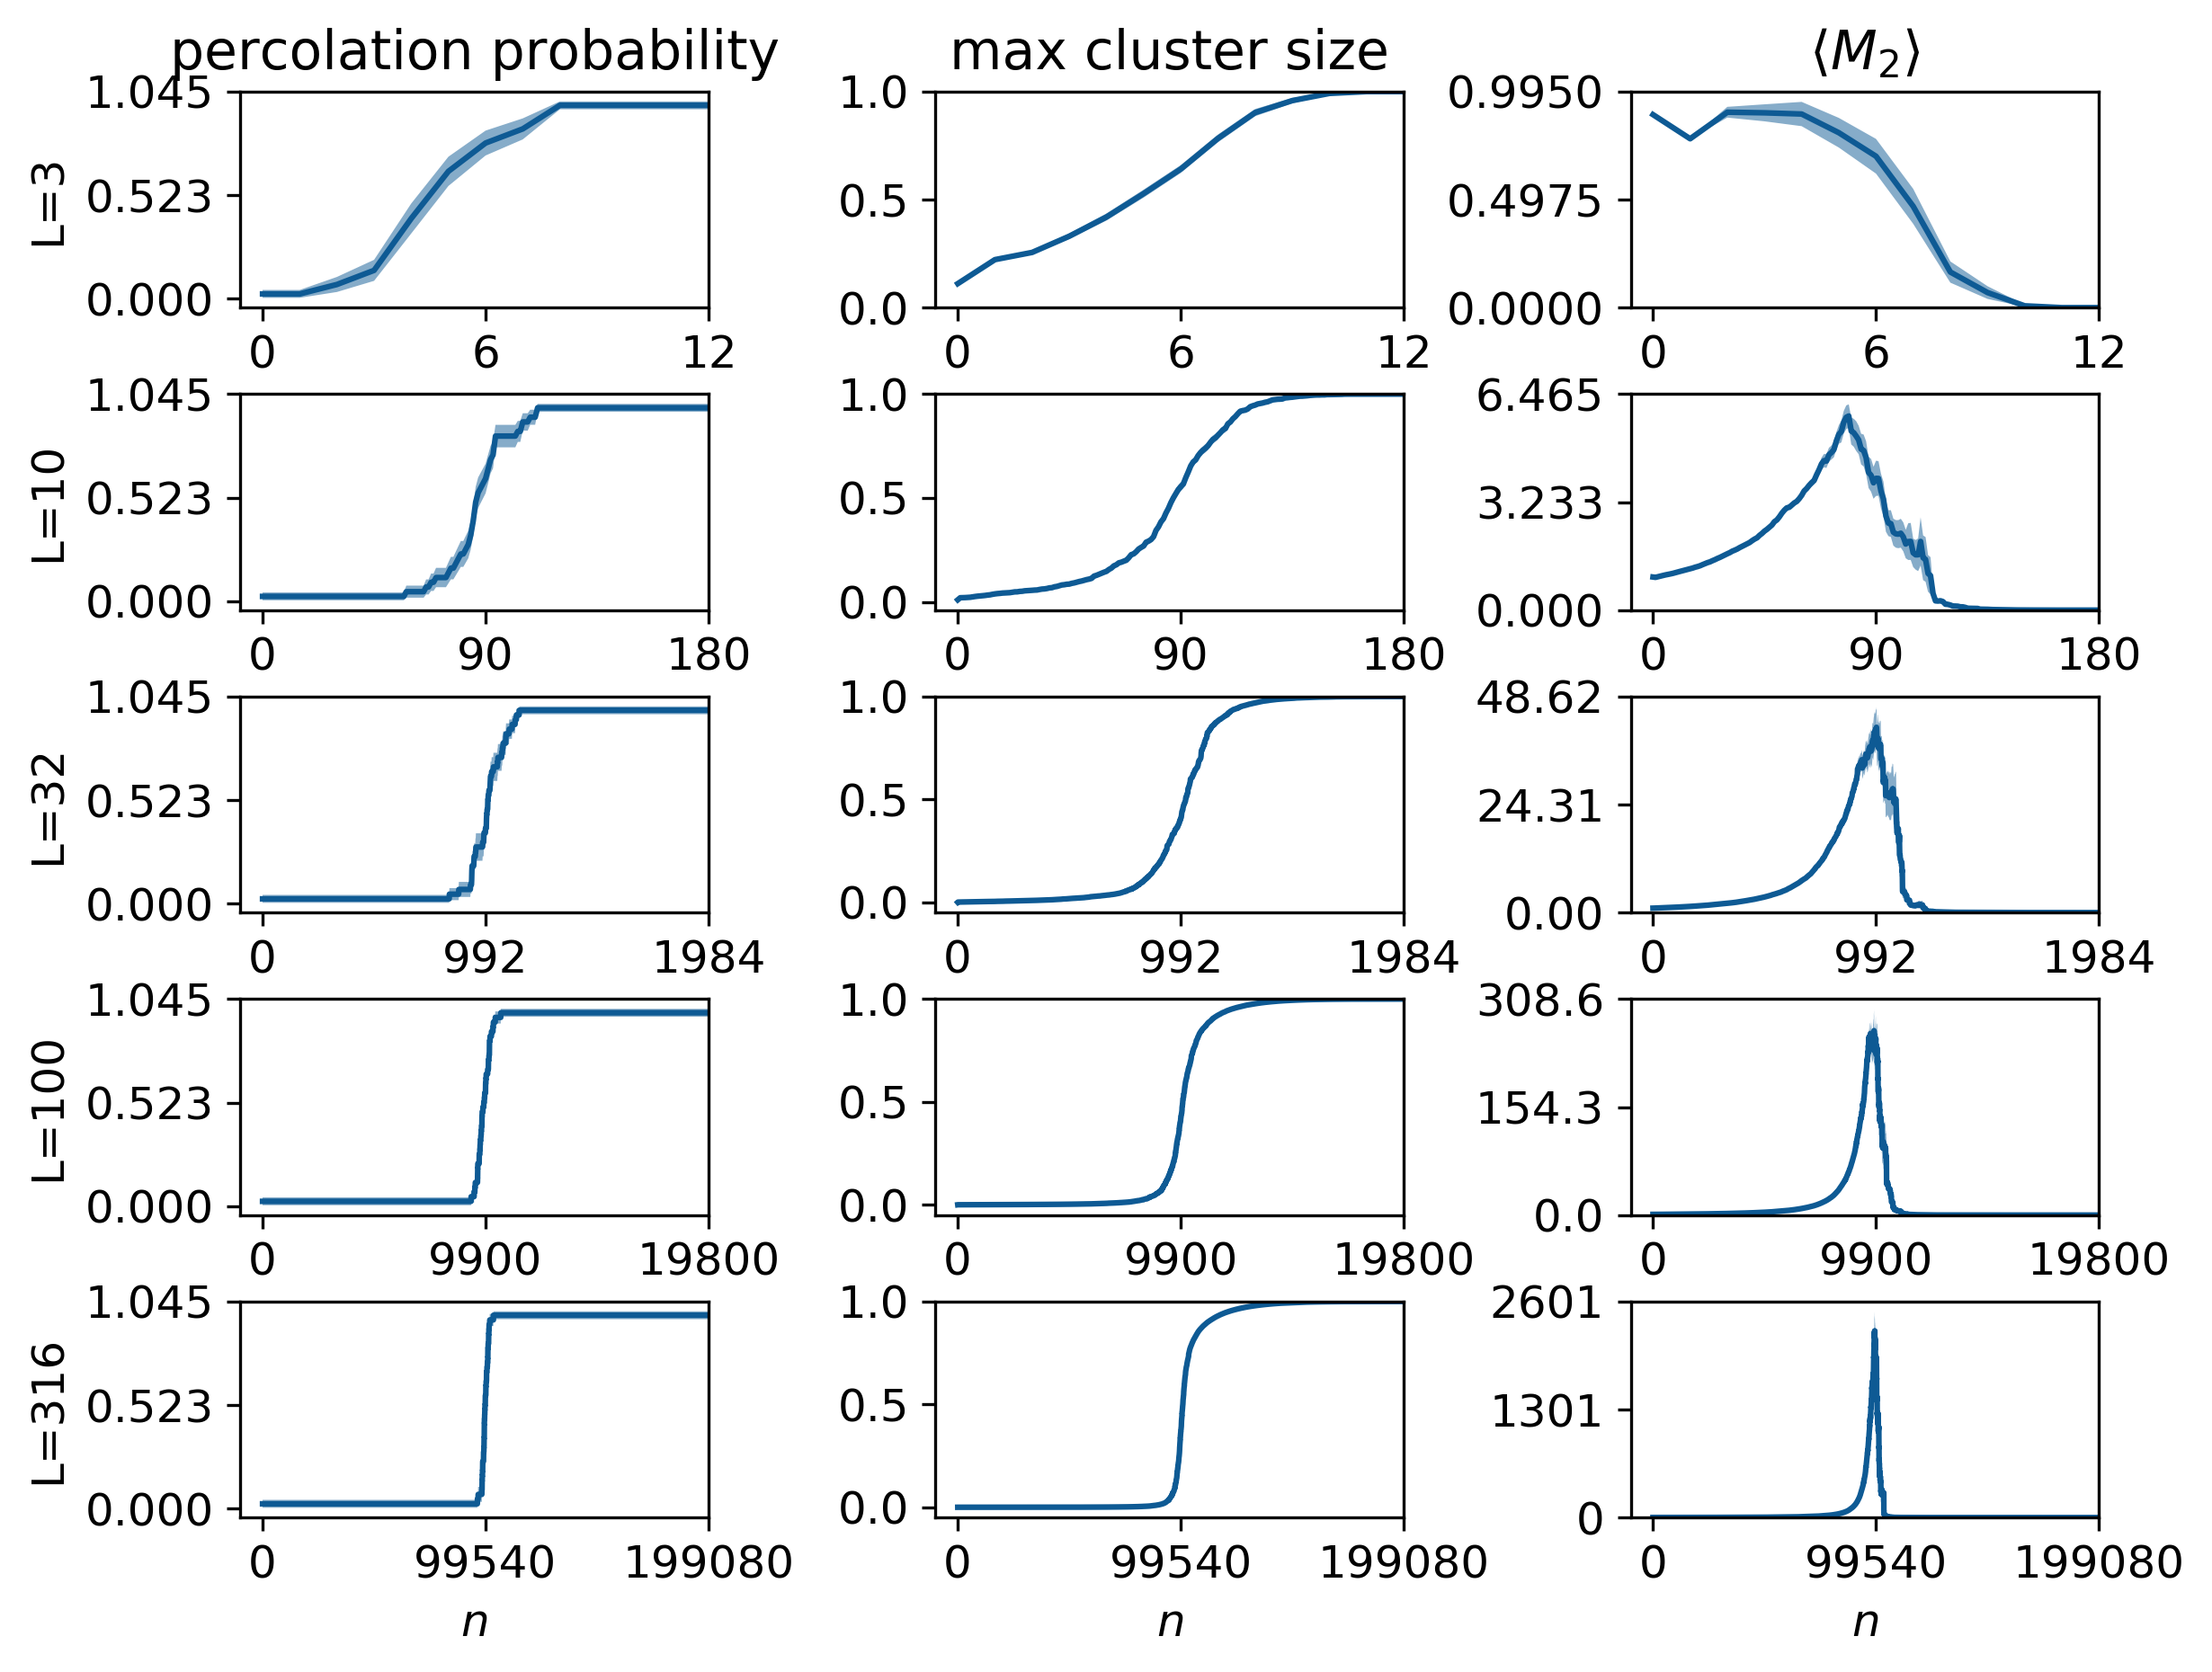

In [33]:
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ls), ncols=3, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(grid_ls):
    avg_arrays = grid_microcanonical_averages_arrays[l_index]
    
    line, = axes[l_index, 0].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster'],
        rasterized=True,
    )
    axes[l_index, 0].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['spanning_cluster_ci'].T[1],
        avg_arrays['spanning_cluster_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )
    
    line, = axes[l_index, 1].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size'],
        rasterized=True,
    )    
    axes[l_index, 1].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['max_cluster_size_ci'].T[1],
        avg_arrays['max_cluster_size_ci'].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )

    axes[l_index, 2].plot(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments'][2],
        rasterized=True,
    )        
    axes[l_index, 2].fill_between(
        np.arange(avg_arrays['M'] + 1),
        avg_arrays['moments_ci'][2].T[1],
        avg_arrays['moments_ci'][2].T[0],
        facecolor=line.get_color(),
        alpha=0.5,
        rasterized=True,
    )
    
    
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))
    axes[l_index, 1].set_ylim(ymax=1.0)
    axes[l_index, 2].set_ylim(ymin=0.0)
    
    for ax in axes[l_index, :]:
        num_edges = avg_arrays['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'percolation probability')
axes[0, 1].set_title(r'max cluster size')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')
    
plt.tight_layout(0)
plt.show()

**Figure**: Microcanonical averages of cluster statistics of bond percolation on the $L \times L$ square grid, over $40$ runs. The samples of the microcanonical ensembles have been evolved by the Newman-Ziff algorithm over all occupation numbers $n = 0 \ldots 2 L (L - 1)$.

## Canonical ensemble averages

Having computed the microcanonical averages for all occupation numbers $n$, the last step is to transform them to canonical averages for the desired values of the occupation probability $p$.

### Linear chain

In [26]:
# occupation probabilities
chain_ps_arrays = [ np.linspace(1.0 - x, 1.0, num=100) for x in [1.0, 0.1, 0.01] ]

In [27]:
# compute canonical averages from microcanonical averages
# for all occupation probabilities and system sizes
chain_stats = [
    [
        percolate.canonical_averages(ps, avg_arrays)
        for avg_arrays in chain_microcanonical_averages_arrays
    ]
    for ps in chain_ps_arrays
]

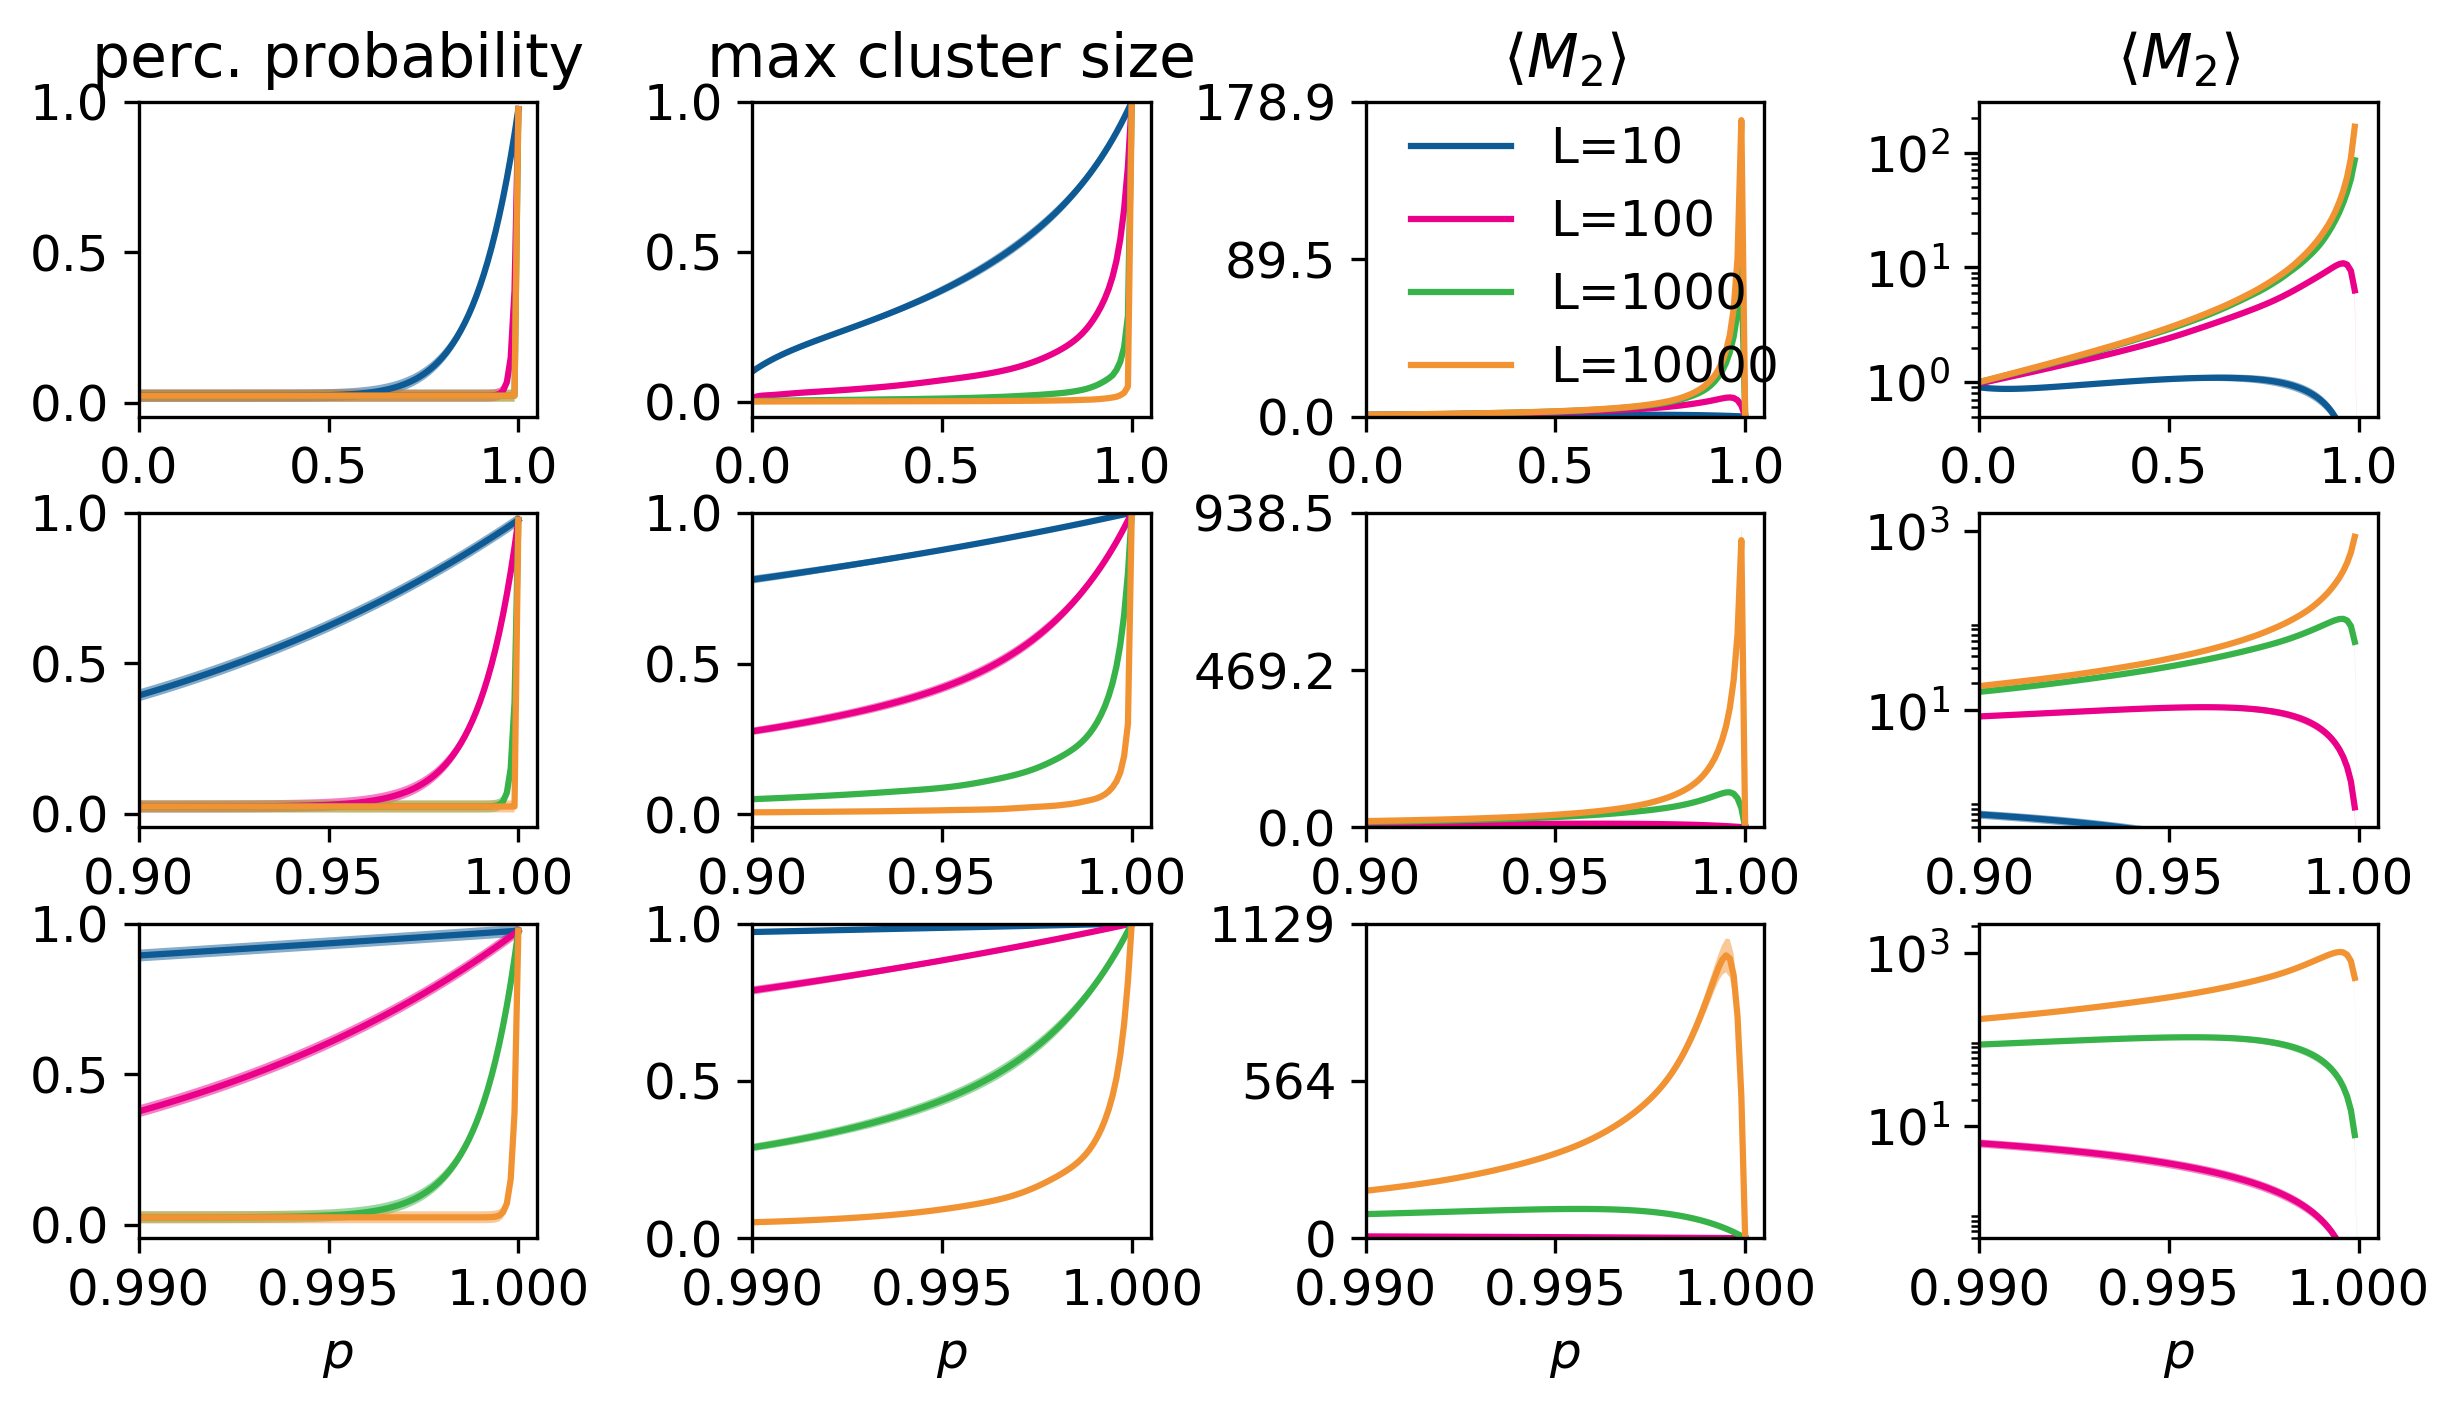

In [34]:
# plot
fig, axes = plt.subplots(
    nrows=len(chain_ps_arrays), ncols=4, squeeze=True, figsize=(8.0, 4.5)
)
for ps_index, ps in enumerate(chain_ps_arrays):
    for l_index, l in enumerate(chain_ls):
        my_stats = chain_stats[ps_index][l_index]
    
        line, = axes[ps_index, 0].plot(
            ps,
            my_stats['spanning_cluster'],
            rasterized=True,
            label=r'{}'.format(l),
        )
        axes[ps_index, 0].fill_between(
            ps,
            my_stats['spanning_cluster_ci'].T[1],
            my_stats['spanning_cluster_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
    
        line, = axes[ps_index, 1].plot(
            ps,
            my_stats['max_cluster_size'],
            rasterized=True,
            label=r'L={}'.format(l),
        )    
        axes[ps_index, 1].fill_between(
            ps,
            my_stats['max_cluster_size_ci'].T[1],
            my_stats['max_cluster_size_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )

        axes[ps_index, 2].plot(
            ps,
            my_stats['moments'][2],
            rasterized=True,
            label=r'L={}'.format(l),
        )        
        axes[ps_index, 2].fill_between(
            ps,
            my_stats['moments_ci'][2].T[1],
            my_stats['moments_ci'][2].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
        
        axes[ps_index, 3].semilogy(
            ps,
            my_stats['moments'][2],
            rasterized=True,
        )        
        axes[ps_index, 3].fill_between(
            ps,
            np.where(
                my_stats['moments_ci'][2].T[1] > 0.0,
                my_stats['moments_ci'][2].T[1],
                0.01
            ),
            np.where(
                my_stats['moments_ci'][2].T[0] > 0.0,
                my_stats['moments_ci'][2].T[0],
                0.01
            ),
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
        
    
    axes[ps_index, 0].set_ylim(ymax=1.0)
    axes[ps_index, 1].set_ylim(ymax=1.0)
    axes[ps_index, 2].set_ylim(ymin=0.0)
    axes[ps_index, 3].set_ylim(ymin=0.5)
    
    for ax in axes[ps_index, :]:
        ax.set_xlim(xmin=ps.min(), xmax=ps.max() + (ps.max() - ps.min()) * 0.05)
        ax.set_xticks(np.linspace(ps.min(), ps.max(), num=3))
        
    for ax in axes[ps_index, :-1]:
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'perc. probability')
axes[0, 1].set_title(r'max cluster size')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')
axes[0, 3].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$p$')

axes[0, 2].legend(frameon=False, loc='center left')

plt.tight_layout(0)
plt.show()

**Figure**: Canonical averages of cluster statistics of bond percolation on the linear chain with $L$ nodes, over $40$ runs.

### Square grid

In [29]:
# occupation probabilities
grid_ps_arrays = [ np.linspace(0.5 - x, 0.5 + x, num=100) for x in [0.5, 0.05] ]

In [30]:
# compute canonical averages from microcanonical averages
# for all occupation probabilities and system sizes
grid_stats = [
    [
        percolate.canonical_averages(ps, avg_arrays)
        for avg_arrays in grid_microcanonical_averages_arrays
    ]
    for ps in grid_ps_arrays
]

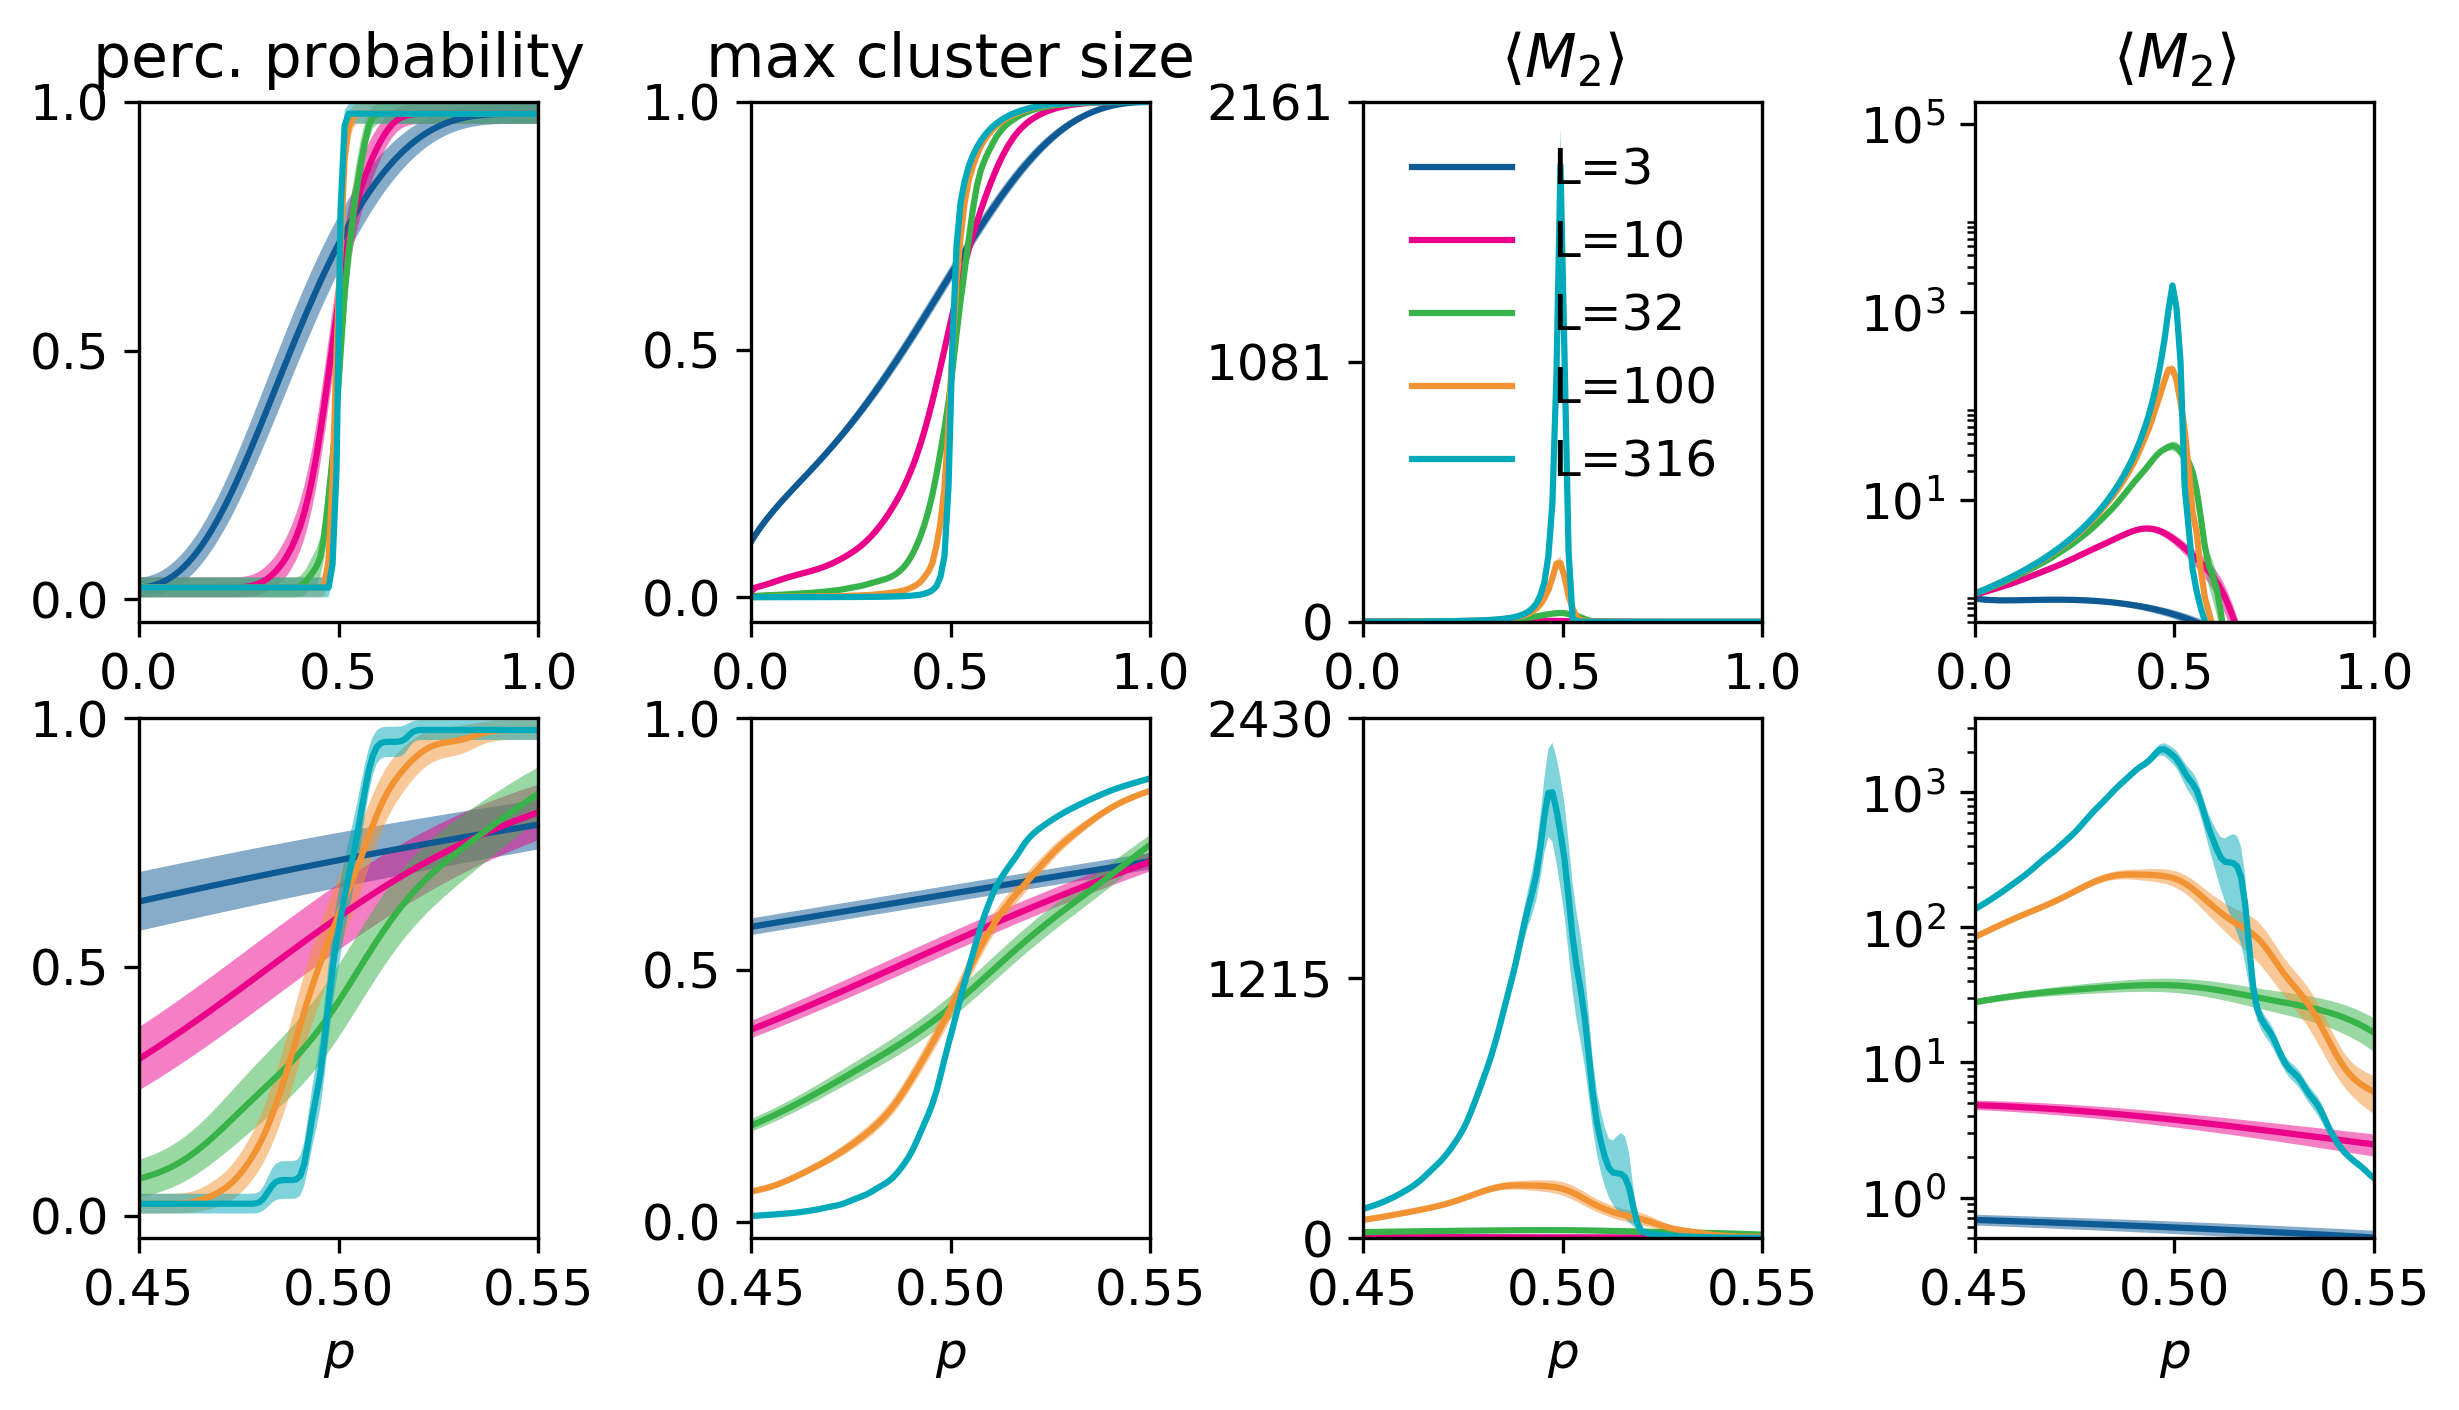

In [35]:
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ps_arrays), ncols=4, squeeze=True, figsize=(8.0, 4.5)
)
for ps_index, ps in enumerate(grid_ps_arrays):
    for l_index, l in enumerate(grid_ls):
        my_stats = grid_stats[ps_index][l_index]
    
        line, = axes[ps_index, 0].plot(
            ps,
            my_stats['spanning_cluster'],
            rasterized=True,
            label=r'L={}'.format(l),
        )
        axes[ps_index, 0].fill_between(
            ps,
            my_stats['spanning_cluster_ci'].T[1],
            my_stats['spanning_cluster_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
    
        line, = axes[ps_index, 1].plot(
            ps,
            my_stats['max_cluster_size'],
            rasterized=True,
            label=r'L={}'.format(l),
        )    
        axes[ps_index, 1].fill_between(
            ps,
            my_stats['max_cluster_size_ci'].T[1],
            my_stats['max_cluster_size_ci'].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )

        axes[ps_index, 2].plot(
            ps,
            my_stats['moments'][2],
            rasterized=True,
            label=r'L={}'.format(l),
        )        
        axes[ps_index, 2].fill_between(
            ps,
            my_stats['moments_ci'][2].T[1],
            my_stats['moments_ci'][2].T[0],
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
        
        axes[ps_index, 3].semilogy(
            ps,
            my_stats['moments'][2],
            rasterized=True,
        )        
        axes[ps_index, 3].fill_between(
            ps,
            np.where(
                my_stats['moments_ci'][2].T[1] > 0.0,
                my_stats['moments_ci'][2].T[1],
                0.01
            ),
            np.where(
                my_stats['moments_ci'][2].T[0] > 0.0,
                my_stats['moments_ci'][2].T[0],
                0.01
            ),
            facecolor=line.get_color(),
            alpha=0.5,
            rasterized=True,
        )
        
    
    axes[ps_index, 0].set_ylim(ymax=1.0)
    axes[ps_index, 1].set_ylim(ymax=1.0)
    axes[ps_index, 2].set_ylim(ymin=0.0)
    axes[ps_index, 3].set_ylim(ymin=0.5)
    
    for ax in axes[ps_index, :]:
        ax.set_xlim(xmin=ps.min(), xmax=ps.max())
        ax.set_xticks(np.linspace(ps.min(), ps.max(), num=3))
        
    for ax in axes[ps_index, :-1]:
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))
        
axes[0, 0].set_title(r'perc. probability')
axes[0, 1].set_title(r'max cluster size')
axes[0, 2].set_title(r'$\langle M_2 \rangle$')
axes[0, 3].set_title(r'$\langle M_2 \rangle$')

for ax in axes[-1, :]:
    ax.set_xlabel(r'$p$')

axes[0, 2].legend(frameon=False, loc='best')

plt.tight_layout(0)
plt.show()

**Figure**: Canonical averages of cluster statistics of bond percolation on the $L \times L$ square grid, over $40$ runs.